## Exercise 6.3: Original Case Study Part 1

### DSC 550

#### Taniya Adhikari 1/25/2021

### Case Study:  Analyze data for loan approval prediction

### Statement


### Data

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import yellowbrick
import seaborn as sns


import warnings; warnings.simplefilter('ignore')

### 1.	Load the data from the “train.csv” file into a DataFrame.

In [25]:
# Loading the data
data = pd.read_csv("loan-train.csv")

### 2.	Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.data

In [26]:
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (614, 13)


It has 614 records and 13 variables

### 3.	Display the first 5 rows of data so you can see the column headings and the type of data for each column.

In [27]:
# Display the data
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_Status variable is Boolean variable with Y or N, Missing values have NaN. Loan_Status will be the target variable and all other columns will be features.

### 4.	Data Cleaning Steps.

In [28]:
# Checking data type
def Datatype(df):
    # shape and data types of the data
    print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print(df.dtypes)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    print(non_numeric_cols)
    
Datatype(data)

There are 614 rows and 13 columns
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History']
['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'Property_Area' 'Loan_Status']


In [29]:
# Check for duplicates
print("Loan ID duplicated: {}".format(any(data.Loan_ID.duplicated())))

Loan ID duplicated: False


In [30]:
# check for missing value
def percentMissing(df):
    
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)
    
    # % of missing data
    for col in df.columns:
        # create missing indicator for features with missing data
        missing = df[col].isnull()
        pct_missing = np.mean(missing)*100
        print('{} - {}%'.format(col, round(pct_missing)))
        num_missing = np.sum(missing)
        
    return df

df_missing = percentMissing(data)

['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History']
Loan_ID - 0%
Gender - 2%
Married - 0%
Dependents - 2%
Education - 0%
Self_Employed - 5%
ApplicantIncome - 0%
CoapplicantIncome - 0%
LoanAmount - 4%
Loan_Amount_Term - 2%
Credit_History - 8%
Property_Area - 0%
Loan_Status - 0%


In [31]:
# dropping rows
df = df_missing.dropna(axis=0)
df.shape

(480, 13)

In [32]:
def no_whitespace(string):
    return string.strip()


# stripping white space from all column type as object
def clean_string(df):
    
    for col in df.columns:
        if df[col].dtype == np.object:
            new = '{}_new'.format(col)
            df[new] = df[col].apply(no_whitespace)
            df[col] = df[new]
            df = df.drop(columns=[new])
    return df


df = clean_string(df)
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [33]:
# renaming headers
df = df.rename(columns={"ApplicantIncome" : "Applicant_Income", "CoapplicantIncome": "Coapplicant_Income", "LoanAmount": "Loan_Amount_Thousands", "Loan_Amount_Term": "Loan_Term_Months", "Credit_History": "Credit_History_Requirements", "Loan_Status": "Loan_Approval"})

In [34]:
df["Credit_History_Requirements"].replace({1.0: "Yes", 0.0: "No"}, inplace=True)

### 5.	Summary Statistics of Data

Describing the Statistics of all numerical data

In [35]:
print("Describe Data")
df.describe()

Describe Data


,Applicant_Income,Coapplicant_Income,Loan_Amount_Thousands,Loan_Term_Months
count,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000
std,5668.251251,2617.692267,80.508164,65.212401
min,150.000000,0.000000,9.000000,36.000000
25%,2898.750000,0.000000,100.000000,360.000000
50%,3859.000000,1084.500000,128.000000,360.000000
75%,5852.500000,2253.250000,170.000000,360.000000
max,81000.000000,33837.000000,600.000000,480.000000


Summary for categorical data

In [36]:
print("Summarized Data")
df.describe(include=['O'])

Summarized Data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History_Requirements,Property_Area,Loan_Approval
count,480,480,480,480,480,480,480,480,480
unique,480,2,2,4,2,2,2,3,2
top,LP002529,Male,Yes,0,Graduate,No,Yes,Semiurban,Y
freq,1,394,311,274,383,414,410,191,332


The minimum and maximum of applicant income is 150 and 81,000. So Income can be an important feature. Co-applicant income can also be important variable. Seems like credit_history is either 0 or 1 value.

### 6.	Histograms for Numeric Data

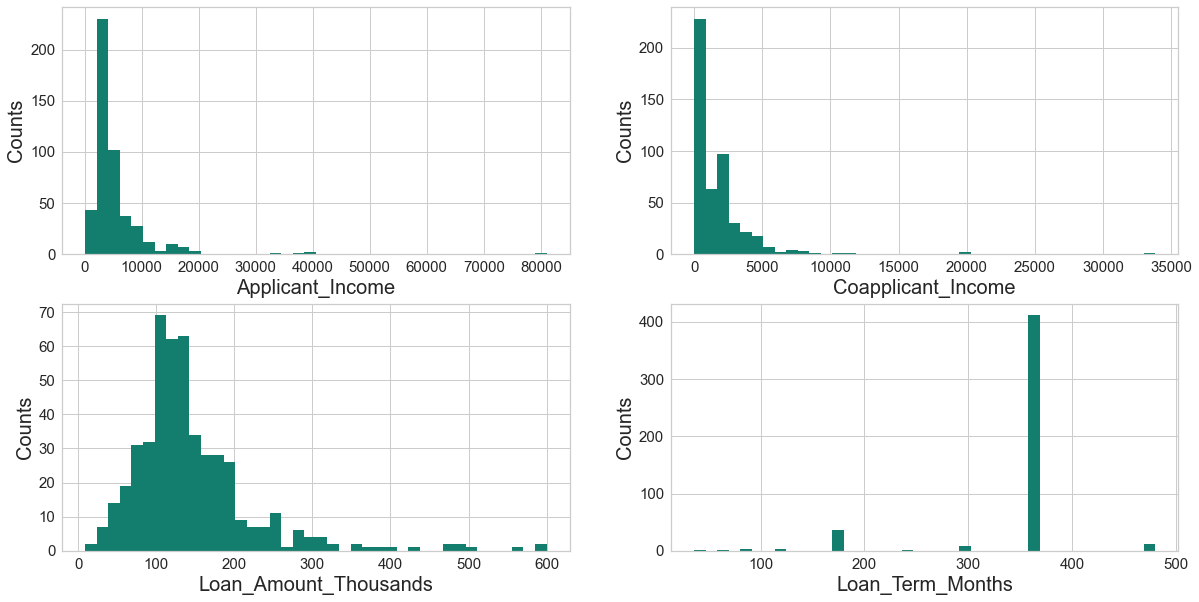

In [37]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount_Thousands', 'Loan_Term_Months']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms in for loop
axes = axes.ravel()
for idx, ax in enumerate(axes):
    # drops NaN values
    ax.hist(df[num_features[idx]].dropna(), bins=40, color= 'xkcd:blue green')
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()


1. Applicant Income has a median ~5000 with extreme value of 81,000
2. Most Applicants had no Co-plicants with mean co-applicant income is ~25000
3. Median loan amoount is ~140,000.
4. Majority of loan term is around 360 months

### 7.	Boxplot for Numeric Data

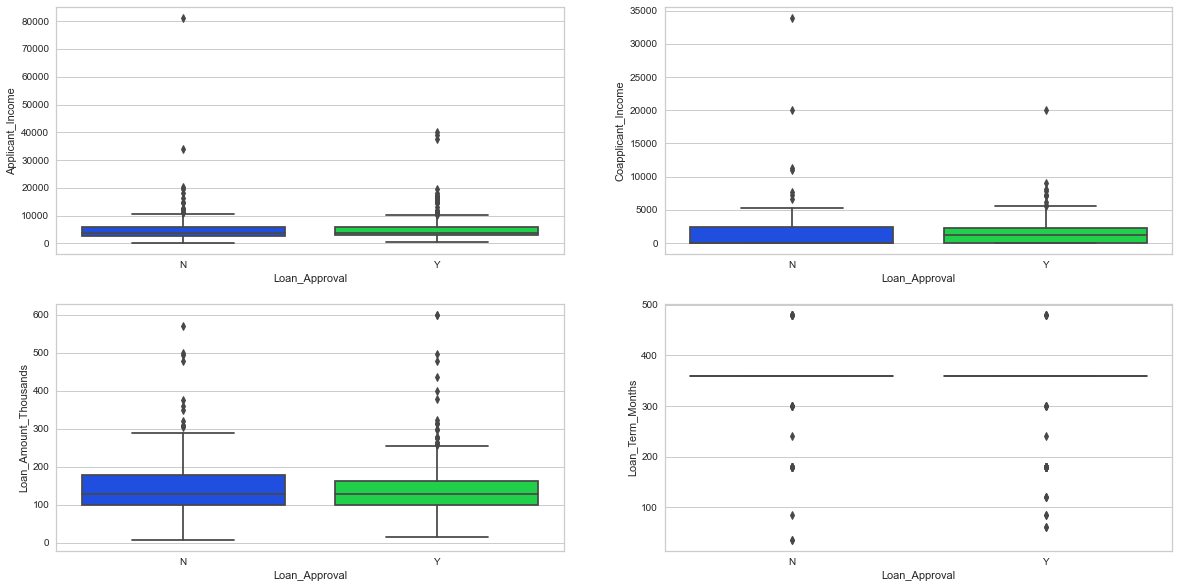

In [38]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw boxplots in for loop
axes = axes.ravel()
for idx, col in enumerate(num_features):
    # seaborn library 
    sns.boxplot(y=col,x='Loan_Approval', data=df, ax=axes[idx])

plt.show()


Numerical Data has no relevance to the Loan Approval

### 7.	Bar Charts for the Categorical Data

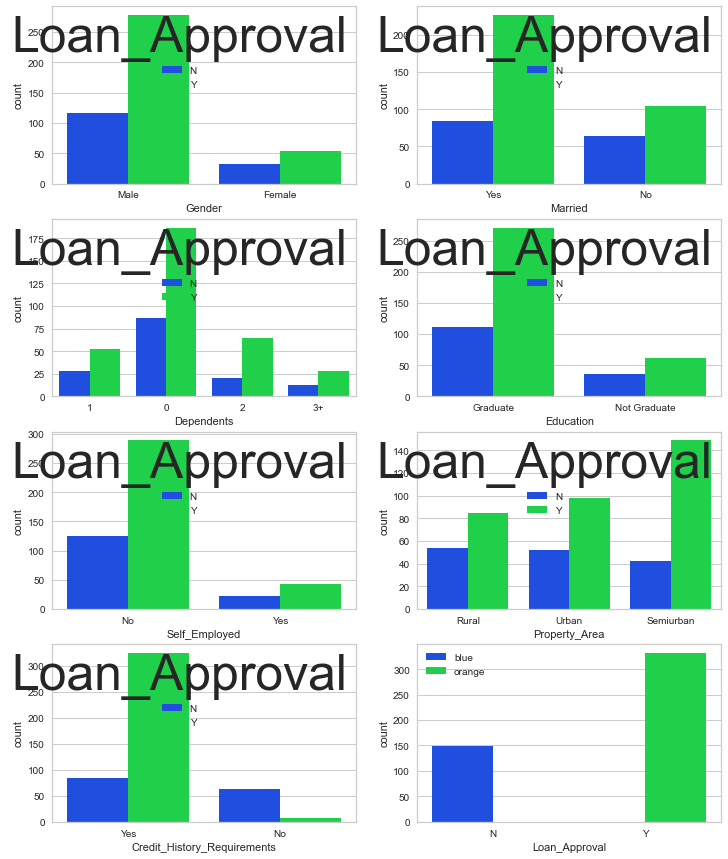

In [60]:
# set figure size
plt.rcParams['figure.figsize'] = (20,10)

cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History_Requirements', 'Loan_Approval']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,col in enumerate(cat_features):
    row,column = idx//2,idx%2
    sns.countplot(x=col,data=df,hue=df['Loan_Approval'],ax=axes[row,column])
    plt.legend(["blue", "orange"], prop={"size":10})


1. More males applied for the loan.
2. There were more married people applied to the loan and has higher rates for approval
3. There are higher approvals for applicants with 0 Dependents.
4. Applicants with Graduate degree has higher approval rates
5. Self-Employed applicants have low approval rate. 
6. Applicants from Semi-urban areas are likely to be approved.
7. Applicants who meet the credit history requirements are more likely to be approved for th eloan
8. About 69% of the Loans are approved

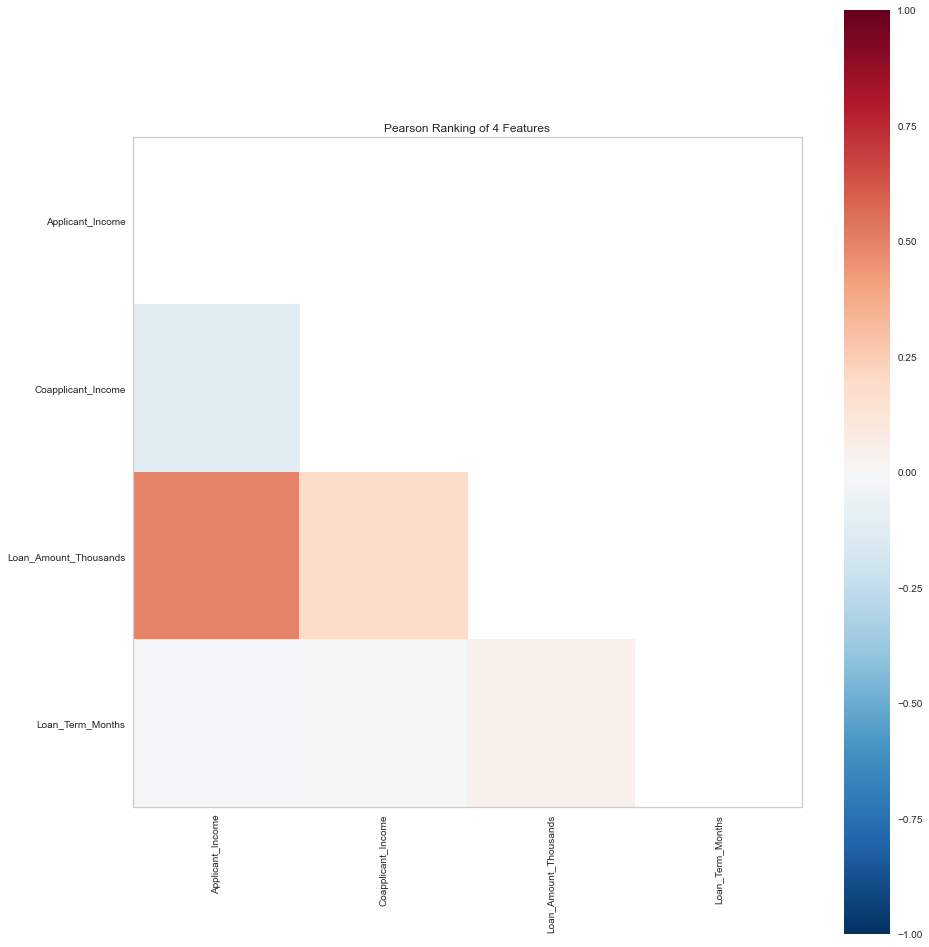

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

In [16]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 17)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')

# Fit the data to the visualizer
visualizer.fit(X)

# Transform the data
visualizer.transform(X)

visualizer.show()